In [1]:
# from google.colab import files
# uploaded = files.upload()

In [2]:
import io
import pandas as pd

df = pd.read_csv('Customer-Churn-Records.csv')
print(df)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [3]:
import seaborn as sbs
import matplotlib.pyplot as plt
import numpy as np

from ydata_profiling import ProfileReport

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,classification_report,mean_squared_error

import shap

In [4]:
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
7957,7958,15582149,Ts'ui,850,Germany,Female,34,3,129668.43,2,1,1,88743.99,0,0,5,SILVER,468
291,292,15607098,Ahmed,747,Spain,Female,41,5,94521.17,2,1,0,194926.86,0,0,1,DIAMOND,806
9453,9454,15769402,Carpenter,667,France,Male,27,7,156811.74,1,1,1,149402.59,0,0,4,PLATINUM,277
2767,2768,15747265,Huang,598,Germany,Female,27,10,171283.91,1,1,1,84136.12,0,0,5,GOLD,508
438,439,15783501,Findlay,800,France,Female,38,2,168190.33,2,1,0,68052.08,0,0,3,SILVER,874
1646,1647,15651533,Brown,570,Germany,Female,50,5,129293.74,1,1,0,177805.44,1,1,4,DIAMOND,988
7558,7559,15642098,Cox,622,Spain,Female,36,0,108960.00,2,1,0,111180.30,1,1,1,PLATINUM,532
3305,3306,15574072,Ch'ien,786,France,Female,62,8,0.00,1,1,1,165702.64,0,0,2,SILVER,765
3628,3629,15573319,Azubuike,493,Germany,Female,35,8,178317.60,1,0,0,197428.64,0,0,1,SILVER,738
7758,7759,15684358,Kang,711,France,Male,41,3,0.00,2,1,1,193747.57,0,0,4,GOLD,876


In [5]:
df.drop(axis=1,columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [6]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [7]:
# ProfileReport(df)

In [8]:
cat_col=['Geography','Gender','Card Type']

In [9]:
df.drop(axis=1,columns=cat_col).corrwith(other=df['Exited'])

CreditScore          -0.026771
Age                   0.285296
Tenure               -0.013656
Balance               0.118577
NumOfProducts        -0.047611
HasCrCard            -0.006976
IsActiveMember       -0.156356
EstimatedSalary       0.012490
Exited                1.000000
Complain              0.995693
Satisfaction Score   -0.005849
Point Earned         -0.004628
dtype: float64

In [10]:
df.drop(axis=1,columns=cat_col).skew()

CreditScore          -0.071607
Age                   1.011320
Tenure                0.010991
Balance              -0.141109
NumOfProducts         0.745568
HasCrCard            -0.901812
IsActiveMember       -0.060437
EstimatedSalary       0.002085
Exited                1.470845
Complain              1.466263
Satisfaction Score   -0.008936
Point Earned          0.008344
dtype: float64

In [11]:

X_train,X_test,y_train,y_test=train_test_split(df.drop('Exited',axis=1),df['Exited'],test_size=0.2,random_state=5)

In [12]:
X_train_cat=X_train[cat_col]
X_test_cat=X_test[cat_col]

In [13]:
X_train_num=X_train.drop(axis=1,columns=cat_col)
X_test_num=X_test.drop(axis=1,columns=cat_col)

In [14]:
X_train_cat

,Geography,Gender,Card Type
7751,Spain,Female,PLATINUM
4154,France,Male,PLATINUM
3881,France,Female,SILVER
9238,France,Female,GOLD
5210,France,Male,DIAMOND
...,...,...,...
3046,Germany,Female,SILVER
9917,Germany,Male,SILVER
4079,France,Female,DIAMOND
2254,France,Male,PLATINUM


<Axes: >

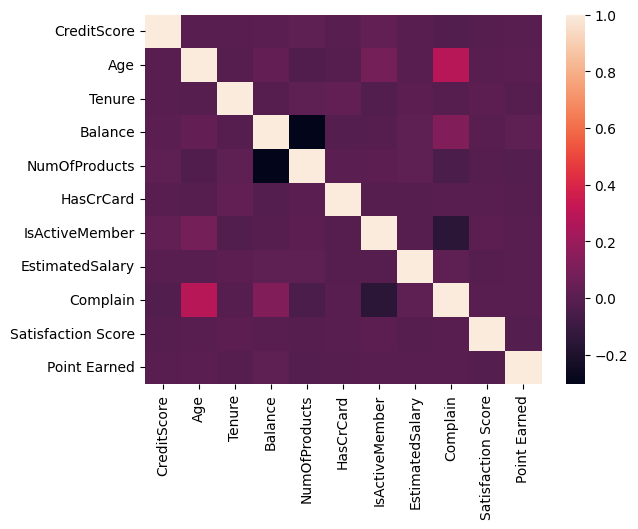

In [15]:
num_col=X_train_num.columns
sbs.heatmap(df[num_col].corr())

In [16]:
# sbs.pairplot(df)

In [17]:
data=[['DIAMOND','PLATINUM','GOLD','SILVER']]

In [18]:
transformer=ColumnTransformer(transformers=[('Ordinal_Encoding',OrdinalEncoder(categories=data),['Card Type']),
                                            ('One_Hot_Encoding',OneHotEncoder(drop='first'),['Gender','Geography']),
                                            ('Yeo-JohnsonTransformer',PowerTransformer('yeo-johnson'),['Balance']),
                                            ('MinMaxScaler',MinMaxScaler(),['NumOfProducts','Age','CreditScore','Point Earned'])],
                                            remainder='passthrough')

In [19]:
pipeline=Pipeline(steps=[('preprocessing',transformer),('classifier',RandomForestClassifier())])

In [20]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Ordinal_Encoding',
                                                  OrdinalEncoder(categories=[['DIAMOND',
                                                                              'PLATINUM',
                                                                              'GOLD',
                                                                              'SILVER']]),
                                                  ['Card Type']),
                                                 ('One_Hot_Encoding',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender', 'Geography']),
                                                 ('Yeo-JohnsonTransformer',
                                                  PowerTransformer(),
                                                  ['Balance']),
                                                 ('MinMaxScaler',
                                                  MinMaxScaler(),
                                                  ['NumOfProducts', 'Age',
                                                   'CreditScore',
                                                   'Point Earned'])])),
                ('classifier', RandomForestClassifier())])

In [21]:
# X_train_transformed=transformer.fit_transform(X_train)
# X_test_transformed=transformer.transform(X_test)

In [22]:
# classifier=RandomForestClassifier(random_state=42)

In [23]:
# my_model=classifier.fit(X_train_transformed,y_train)

In [24]:
X_train.drop(axis=1,columns=cat_col).skew()

CreditScore          -0.070166
Age                   1.034482
Tenure                0.016585
Balance              -0.148462
NumOfProducts         0.737134
HasCrCard            -0.902506
IsActiveMember       -0.048023
EstimatedSalary      -0.001158
Complain              1.463651
Satisfaction Score   -0.015492
Point Earned          0.019720
dtype: float64

In [25]:
# y_pred=classifier.predict(X_test_transformed)

In [26]:
y_pred=pipeline.predict(X_test)

In [27]:
confusion_matrix(y_pred=y_pred,y_true=y_test)

array([[1594,    1],
       [   0,  405]])

In [28]:
accuracy_score(y_pred=y_pred,y_true=y_test)

0.9995

In [29]:
f1_score(y_pred=y_pred,y_true=y_test)

0.998766954377312

In [30]:
mean_squared_error(y_pred=y_pred,y_true=y_test)

0.0005

In [31]:
precision_score(y_pred=y_pred,y_true=y_test)

0.9975369458128078

In [32]:
report=classification_report(y_pred=y_pred,y_true=y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1595
           1       1.00      1.00      1.00       405

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [33]:
X_test_transformed = pipeline.named_steps['preprocessing'].transform(X_test)

In [34]:
feature_names = pipeline.named_steps['preprocessing'].get_feature_names_out()

In [35]:
feature_names

array(['Ordinal_Encoding__Card Type', 'One_Hot_Encoding__Gender_Male',
       'One_Hot_Encoding__Geography_Germany',
       'One_Hot_Encoding__Geography_Spain',
       'Yeo-JohnsonTransformer__Balance', 'MinMaxScaler__NumOfProducts',
       'MinMaxScaler__Age', 'MinMaxScaler__CreditScore',
       'MinMaxScaler__Point Earned', 'remainder__Tenure',
       'remainder__HasCrCard', 'remainder__IsActiveMember',
       'remainder__EstimatedSalary', 'remainder__Complain',
       'remainder__Satisfaction Score'], dtype=object)

In [36]:
X_test_transformed

array([[1.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 1.0439378e+05,
        0.0000000e+00, 5.0000000e+00],
       [3.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 7.0179000e+04,
        0.0000000e+00, 3.0000000e+00],
       [2.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0540931e+05,
        0.0000000e+00, 3.0000000e+00],
       ...,
       [2.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.7684353e+05,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 6.1397400e+03,
        0.0000000e+00, 4.0000000e+00],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 1.9714589e+05,
        0.0000000e+00, 1.0000000e+00]])

In [37]:
columns=transformer.get_feature_names_out()

In [38]:
X_test_transformed_df=pd.DataFrame(X_test_transformed,columns=columns)

In [39]:
X_test_transformed_df.head(5)

,Ordinal_Encoding__Card Type,One_Hot_Encoding__Gender_Male,One_Hot_Encoding__Geography_Germany,One_Hot_Encoding__Geography_Spain,Yeo-JohnsonTransformer__Balance,MinMaxScaler__NumOfProducts,MinMaxScaler__Age,MinMaxScaler__CreditScore,MinMaxScaler__Point Earned,remainder__Tenure,remainder__HasCrCard,remainder__IsActiveMember,remainder__EstimatedSalary,remainder__Complain,remainder__Satisfaction Score
0,1.0,1.0,0.0,1.0,-1.332767,0.333333,0.270270,0.838,0.307605,6.0,0.0,0.0,104393.78,0.0,5.0
1,3.0,0.0,0.0,0.0,0.761584,0.333333,0.216216,0.368,0.263337,7.0,1.0,1.0,70179.00,0.0,3.0
2,2.0,0.0,0.0,0.0,0.793320,0.000000,0.216216,0.758,0.607264,9.0,0.0,1.0,105409.31,0.0,3.0
3,0.0,0.0,0.0,0.0,0.564826,0.000000,0.162162,0.538,0.956867,7.0,1.0,1.0,160948.87,0.0,1.0
4,1.0,1.0,0.0,0.0,0.785479,0.333333,0.243243,0.520,0.971623,4.0,1.0,0.0,102638.35,0.0,4.0


In [40]:
explainer = shap.TreeExplainer(pipeline.named_steps['classifier'])

In [41]:
shap_values = explainer.shap_values(X_test_transformed_df)

In [42]:
shap_values

array([[[ 1.26800746e-03, -1.26800746e-03],
        [ 3.00172647e-03, -3.00172647e-03],
        [ 3.80605349e-03, -3.80605349e-03],
        ...,
        [ 1.07676547e-03, -1.07676547e-03],
        [ 1.59276014e-01, -1.59276014e-01],
        [-2.45750119e-03,  2.45750119e-03]],

       [[ 1.94359806e-04, -1.94359806e-04],
        [-3.31344969e-03,  3.31344969e-03],
        [ 5.24095422e-03, -5.24095422e-03],
        ...,
        [ 1.59589900e-03, -1.59589900e-03],
        [ 1.57411679e-01, -1.57411679e-01],
        [ 8.57846892e-04, -8.57846892e-04]],

       [[ 4.20233322e-04, -4.20233322e-04],
        [-3.79038894e-03,  3.79038894e-03],
        [ 8.45095995e-03, -8.45095995e-03],
        ...,
        [ 1.52004058e-03, -1.52004058e-03],
        [ 1.66229698e-01, -1.66229698e-01],
        [ 5.22620344e-04, -5.22620344e-04]],

       ...,

       [[ 6.30547206e-04, -6.30547206e-04],
        [-3.71466048e-03,  3.71466048e-03],
        [ 4.24551553e-03, -4.24551553e-03],
        ...,
     

In [43]:
shap_values.shape

(2000, 15, 2)

In [44]:
shap_values=np.delete(shap_values, 1, axis=2)

In [45]:
shap_values=shap_values.reshape(2000,15)

In [46]:
mean_abs_shap_values = np.mean(np.abs(shap_values[1]), axis=0)
print("Mean Absolute SHAP Values: ", mean_abs_shap_values)


Mean Absolute SHAP Values:  0.0146524773005623


In [47]:
feature_importance = pd.DataFrame({
    'feature': columns,
    'shap_value': shap_values[1]
}).sort_values(by='shap_value', ascending=False)

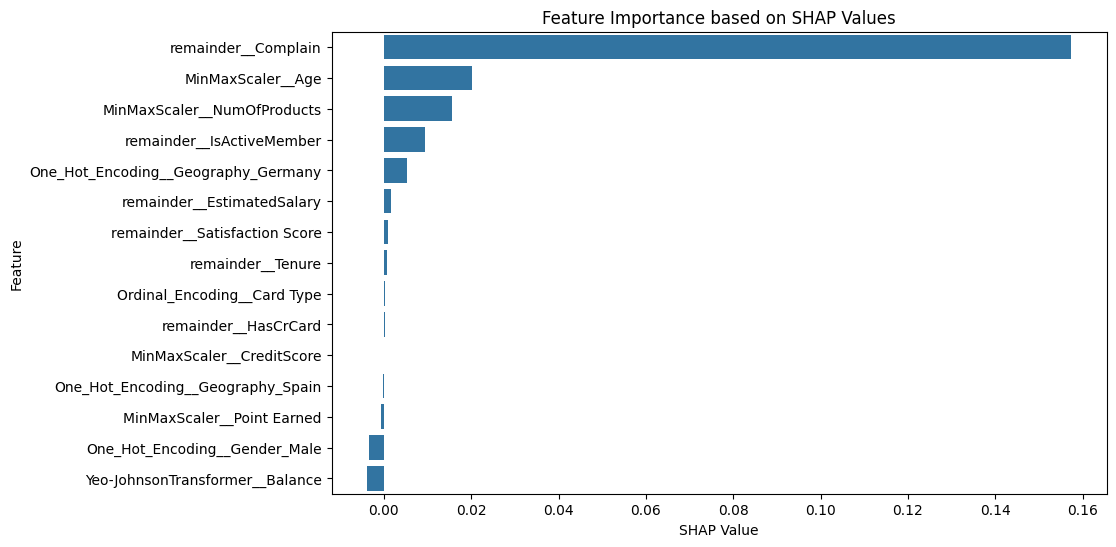

In [48]:
plt.figure(figsize=(10, 6))
sbs.barplot(x='shap_value', y='feature', data=feature_importance)
plt.title('Feature Importance based on SHAP Values')
plt.xlabel('SHAP Value')
plt.ylabel('Feature')
plt.show()

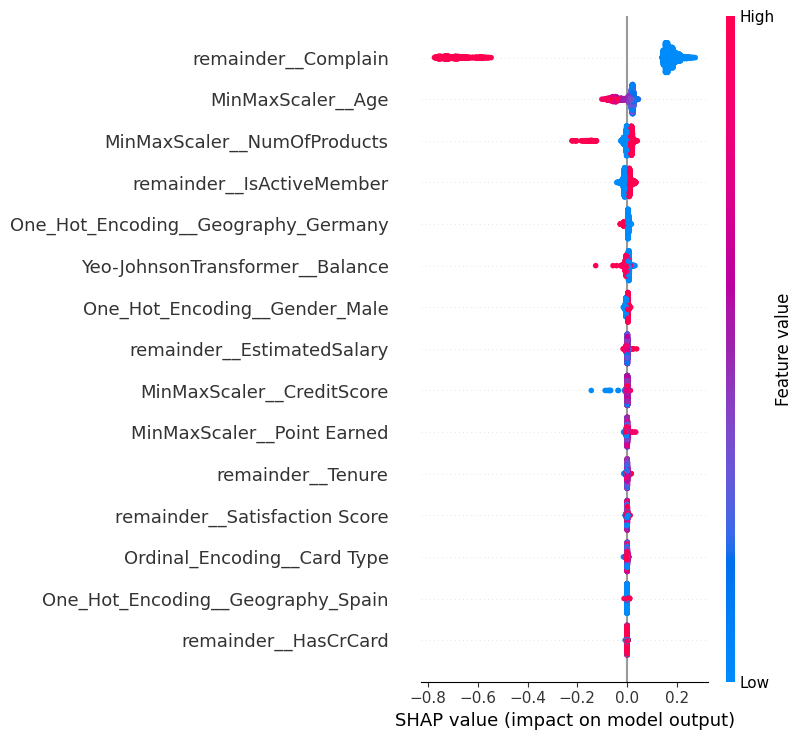

In [49]:
shap.summary_plot(shap_values, X_test_transformed_df, feature_names=columns)